<a href="https://colab.research.google.com/github/sharan11/Intro-to-Deep-Learning-with-Pytorch-Exercise-Solutions/blob/master/Inference_and_Validation_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Inference and Validation

In [4]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, 
                                 train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data/
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, 
                                train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

0it [00:00, ?it/s]

26427392it [00:02, 10676807.87it/s]                             


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


0it [00:00, ?it/s]

32768it [00:00, 75875.78it/s]                            
0it [00:00, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


4423680it [00:01, 3125419.43it/s]                            
0it [00:00, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


8192it [00:00, 25306.68it/s]            

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw
Processing...
Done!


In [0]:
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [0]:
model = Classifier()

images, labels = next(iter(testloader))
# Get the class probabilities
ps = torch.exp(model(images))
# Make sure the shape is appropriate, we should get 10 class probabilities for 64 examples
print(ps.shape)

torch.Size([64, 10])


In [0]:
top_p, top_class = ps.topk(1, dim=1)
# Look at the most likely classes for the first 10 examples
print(top_class[:10,:])

tensor([[9],
        [9],
        [9],
        [9],
        [9],
        [9],
        [9],
        [9],
        [9],
        [9]])


In [0]:
equals = top_class == labels.view(*top_class.shape)

In [0]:
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy: {accuracy.item()*100}%')

Accuracy: 12.5%


**Exercise**: Implement the validation loop below and print out the total accuracy after the loop. You can largely copy and paste the code from above, but I suggest typing it in because writing it out yourself is essential for building the skill. In general you'll always learn more by typing it rather than copy-pasting. You should be able to get an accuracy above 80%.

In [0]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader: 
        optimizer.zero_grad()
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        with torch.no_grad():
          for images, labels in testloader:
            log_ps = model(images)
            test_loss += criterion(log_ps, labels)
            ps = torch.exp(log_ps)
            top_p, top_class = ps.topk(1, dim=1)
            equals = top_class == labels.view(*top_class.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.516..  Test Loss: 0.476..  Test Accuracy: 0.829
Epoch: 2/30..  Training Loss: 0.391..  Test Loss: 0.432..  Test Accuracy: 0.840
Epoch: 3/30..  Training Loss: 0.362..  Test Loss: 0.413..  Test Accuracy: 0.855
Epoch: 4/30..  Training Loss: 0.335..  Test Loss: 0.406..  Test Accuracy: 0.853
Epoch: 5/30..  Training Loss: 0.317..  Test Loss: 0.383..  Test Accuracy: 0.859
Epoch: 6/30..  Training Loss: 0.304..  Test Loss: 0.358..  Test Accuracy: 0.875
Epoch: 7/30..  Training Loss: 0.293..  Test Loss: 0.373..  Test Accuracy: 0.872
Epoch: 8/30..  Training Loss: 0.281..  Test Loss: 0.367..  Test Accuracy: 0.875
Epoch: 9/30..  Training Loss: 0.273..  Test Loss: 0.379..  Test Accuracy: 0.875
Epoch: 10/30..  Training Loss: 0.268..  Test Loss: 0.368..  Test Accuracy: 0.874
Epoch: 11/30..  Training Loss: 0.259..  Test Loss: 0.356..  Test Accuracy: 0.875
Epoch: 12/30..  Training Loss: 0.259..  Test Loss: 0.365..  Test Accuracy: 0.875
Epoch: 13/30..  Training Loss: 0.247.

**Exercise**: Add dropout to your model and train it on Fashion-MNIST again. See if you can get a lower validation loss or higher accuracy

In [0]:
## TODO: Define your model with dropout added
from torch import nn, optim
import torch.nn.functional as F
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))

        # output so no dropout here
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

In [5]:
## TODO: Train your model with dropout, and monitor the training progress with the validation loss and accuracy
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader: 
        optimizer.zero_grad()
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        with torch.no_grad():
          model.eval()
          for images, labels in testloader:
            log_ps = model(images)
            test_loss += criterion(log_ps, labels)
            ps = torch.exp(log_ps)
            top_p, top_class = ps.topk(1, dim=1)
            equals = top_class == labels.view(*top_class.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        model.train()
        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.620..  Test Loss: 0.482..  Test Accuracy: 0.823
Epoch: 2/30..  Training Loss: 0.482..  Test Loss: 0.438..  Test Accuracy: 0.841
Epoch: 3/30..  Training Loss: 0.450..  Test Loss: 0.417..  Test Accuracy: 0.851
Epoch: 4/30..  Training Loss: 0.436..  Test Loss: 0.405..  Test Accuracy: 0.852
Epoch: 5/30..  Training Loss: 0.424..  Test Loss: 0.452..  Test Accuracy: 0.838
Epoch: 6/30..  Training Loss: 0.412..  Test Loss: 0.401..  Test Accuracy: 0.861
Epoch: 7/30..  Training Loss: 0.400..  Test Loss: 0.393..  Test Accuracy: 0.863
Epoch: 8/30..  Training Loss: 0.402..  Test Loss: 0.387..  Test Accuracy: 0.865
Epoch: 9/30..  Training Loss: 0.390..  Test Loss: 0.386..  Test Accuracy: 0.864
Epoch: 10/30..  Training Loss: 0.389..  Test Loss: 0.408..  Test Accuracy: 0.859
Epoch: 11/30..  Training Loss: 0.387..  Test Loss: 0.394..  Test Accuracy: 0.860
Epoch: 12/30..  Training Loss: 0.379..  Test Loss: 0.384..  Test Accuracy: 0.867
Epoch: 13/30..  Training Loss: 0.384.

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

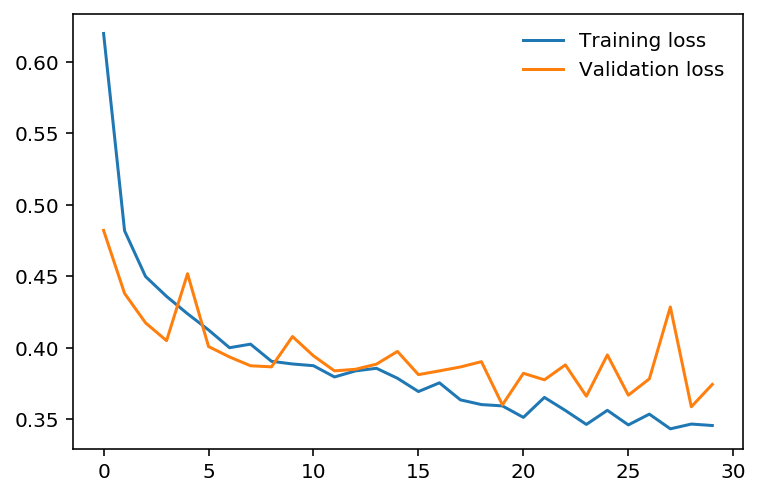

In [7]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

In [0]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

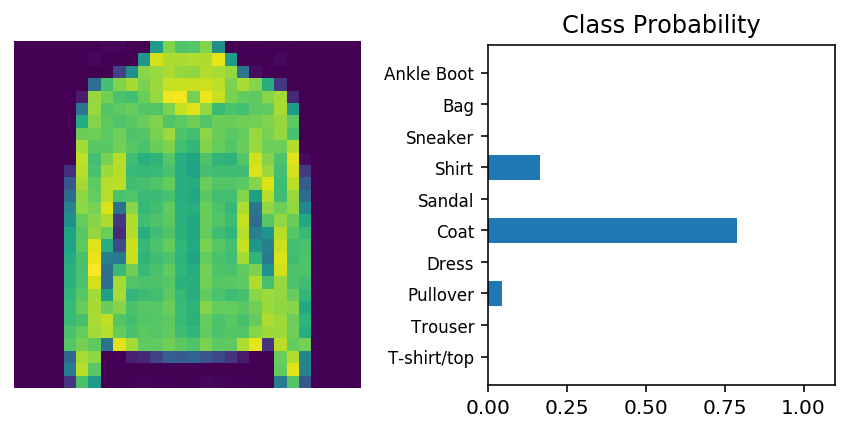

In [10]:
import numpy as np

model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.view(1, 784)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)

# Plot the image and probabilities
view_classify(img.view(1, 28, 28), ps, version='Fashion')